In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [94]:
df = pd.read_csv('weekly_final_data.csv')

In [95]:
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])
df.head()

,air_area_name,genre_name,visitors,current_week,latitude,longitude
0,Tōkyō-to Minato-ku Shibakōen,Japanese food,2069,0,35.658068,139.751599
1,Tōkyō-to Minato-ku Shibakōen,Japanese food,2092,1,35.658068,139.751599
2,Tōkyō-to Minato-ku Shibakōen,Japanese food,2095,2,35.658068,139.751599
3,Tōkyō-to Minato-ku Shibakōen,Japanese food,1999,3,35.658068,139.751599
4,Tōkyō-to Minato-ku Shibakōen,Japanese food,1983,4,35.658068,139.751599


In [96]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
df["air_area_name"] = number.fit_transform(df["air_area_name"].astype('str'))
df["genre_name"] = number.fit_transform(df["genre_name"].astype('str'))

# new_ml_df = air_ml_df[["air_area_name","current_week","visitors"]]
# len(new_ml_df["air_area_name"])
df.head()

,air_area_name,genre_name,visitors,current_week,latitude,longitude
0,46,5,2069,0,35.658068,139.751599
1,46,5,2092,1,35.658068,139.751599
2,46,5,2095,2,35.658068,139.751599
3,46,5,1999,3,35.658068,139.751599
4,46,5,1983,4,35.658068,139.751599


In [97]:
df.head()

,air_area_name,genre_name,visitors,current_week,latitude,longitude
0,46,5,2069,0,35.658068,139.751599
1,46,5,2092,1,35.658068,139.751599
2,46,5,2095,2,35.658068,139.751599
3,46,5,1999,3,35.658068,139.751599
4,46,5,1983,4,35.658068,139.751599


In [98]:
def min_max_normalize(lst):
    minimum = min(lst)
    maximum = max(lst)
    normalized = []
    for val in lst:
        normalized.append((val-minimum)/(maximum-minimum))
    return normalized

In [101]:
#normalize values in df
new_dict = {}

for id in df.columns:
    #if id != 'current_week':
    new_dict[id] = min_max_normalize(df[id])
        
#create normalized df
new_df = pd.DataFrame(new_dict)
#new_df = new_df.drop(columns='new')
new_df.head()

,air_area_name,genre_name,visitors,current_week,latitude,longitude
0,0.597403,0.625,0.199688,0.000000,0.226309,0.6788
1,0.597403,0.625,0.201928,0.019231,0.226309,0.6788
2,0.597403,0.625,0.202220,0.038462,0.226309,0.6788
3,0.597403,0.625,0.192873,0.057692,0.226309,0.6788
4,0.597403,0.625,0.191315,0.076923,0.226309,0.6788


In [103]:
#group by week and find avg visitors per week
week_group = new_df.groupby(['current_week'])
mean_visitor_per_week = week_group['visitors'].mean()

#convert to df
# weeks = []
# means = []
# for key, value in mean_visitor_per_week.items():
#     weeks.append(key)
#     means.append(value)
    
# mean_dict = {'current_week': weeks, 'avg_visitors': means}
# mean_df = pd.DataFrame(mean_dict)
# mean_df.head()

#Easier way of converting to df
mean_df = pd.DataFrame(mean_visitor_per_week)
mean_df = mean_df.reset_index()
mean_df.head()

,current_week,visitors
0,0.000000,0.048505
1,0.019231,0.049780
2,0.038462,0.048960
3,0.057692,0.052378
4,0.076923,0.049703


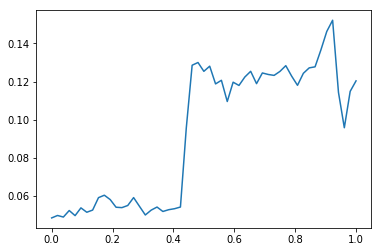

In [75]:
#compare weekly visitors
plt.plot(mean_df['current_week'], mean_df['visitors'])
plt.show()

In [108]:
X = mean_df['current_week'].values
y = mean_df['visitors'].values
X = X.reshape(-1,1)
y = y.reshape(-1,1)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (53, 1)
y shape:  (53, 1)


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [110]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=5)

In [111]:
regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

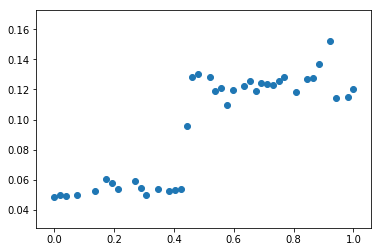

In [113]:
plt.scatter(X_train, y_train)
plt.show()

In [114]:
predict = regressor.predict(X_train)

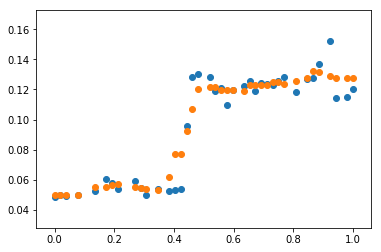

In [115]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, predict)
plt.show()

In [116]:
regressor.score(X_train, y_train)

0.9360620233253385

In [117]:
predict_test = regressor.predict(X_test)

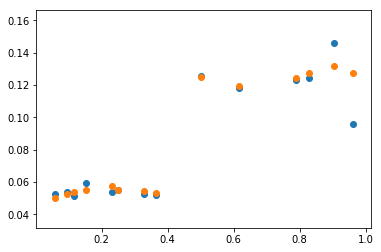

In [119]:
plt.scatter(X_test, y_test)
plt.scatter(X_test, predict_test)
plt.show()

In [120]:
regressor.score(X_test, y_test)

0.9254978376574279

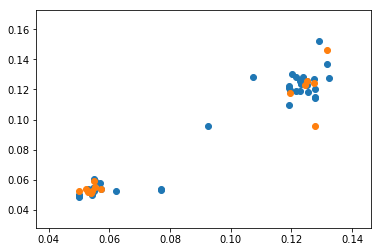

In [121]:
plt.scatter(predict, y_train)
plt.scatter(predict_test, y_test)

k: 1, Train/Test Score: 1.000/0.964
k: 3, Train/Test Score: 0.976/0.931
k: 5, Train/Test Score: 0.936/0.925
k: 7, Train/Test Score: 0.907/0.913
k: 9, Train/Test Score: 0.886/0.893
k: 11, Train/Test Score: 0.857/0.855
k: 13, Train/Test Score: 0.826/0.832
k: 15, Train/Test Score: 0.808/0.828
k: 17, Train/Test Score: 0.795/0.782
k: 19, Train/Test Score: 0.757/0.733


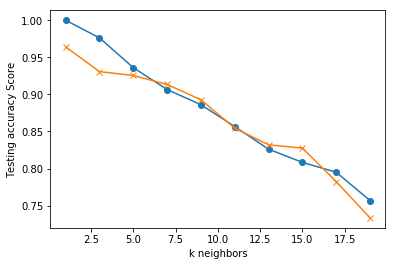

In [125]:
#Check for optimal k
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()